<a href="https://colab.research.google.com/github/Milafreire/WoMakersCode_DataAnalyst/blob/main/Challenge_Modelos_Regressivos_CamilaBarros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Importando os pacotes que serao utilizados nos dois desafios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assimétricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos
import statsmodels.api as sm ## para rodar a regressao
from sklearn.model_selection import train_test_split ## separando treino e teste
from sklearn.feature_selection import RFE ## selecao de features
from sklearn import  linear_model ## para rodar a regressao (outra possibilidade)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("desafio_01_preco_imoveis.csv")

1 - Selecione as principais variáveis que você gostaria de incluir no modelo de
precificação do imóvel.

In [ ]:
X = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']].copy()
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 bedrooms
1 bathrooms
1 floors
1 waterfront
1 view
1 condition
1 grade
1 yr_built
1 lat
1 long
2 sqft_living
3 sqft_above
4 sqft_basement
5 zipcode
6 yr_renovated
7 sqft_lot


Conclusão: utilizando a eliminacao de features recursiva, vimos que as principais variáveis que devemos incluir no modelo são as rankeadas em 1 lugar.

Podiamos também fazer uma análise utilizando a regressao stepwise ou step forward, como aplicado no seguinte exemplo: https://www.datasklr.com/ols-least-squares-regression/variable-selection

In [ ]:
#### Exemplo selecao de variaveis utilizando regressao stepwise to tipo forward.
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01,
                       verbose=True):
    '''
    X -> variáveis explicativas de treino
    y -> variável target de treino
    threshold_in -> limite desejado para significancia estatistica (somente incluir variaveis com p-val < esse valor).

    '''

    initial_list = []
    included = list(initial_list)
    pval_list = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            # Change argmin -> idxmin
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            pval_list.append(best_pval)
            changed=True
            if verbose:
                print('Add {} with p-value {} '.format(best_feature, best_pval))

        if not changed:
            break

    return included, pval_list

In [ ]:
included, pval_list = forward_regression(X_train, y_train, threshold_in = 0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Add bathrooms with p-value 0.0 
Add lat with p-value 0.0 
Add view with p-value 0.0 
Add grade with p-value 0.0 
Add sqft_living with p-value 0.0 
Add yr_built with p-value 0.0 
Add waterfront with p-value 6.813577391047602e-189 
Add bedrooms with p-value 2.0608925972055814e-52 
Add zipcode with p-value 2.429391646871433e-33 
Add long with p-value 3.67743733429644e-35 
Add sqft_above with p-value 6.042175246587843e-14 
Add sqft_basement with p-value 2.102549824730719e-51 
Add condition with p-value 4.464230020584543e-17 
Add yr_renovated with p-value 1.871350805517925e-06 



2. Construa um modelo de regressão linear multivariada para estimar o preço do imóvel.  Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados


In [ ]:
### Utilizando somente as variaveis explicativas selecionadas

X = df[['bedrooms', 'bathrooms','waterfront', 'view', 'condition', 'grade', 'yr_built','lat', 'long']].copy() 
## no X podemos incluir somentre as features selecionadas, seja com RFE ou regressao Stepwise e podemos testar iterativamente.
y = np.log(df['price']) ## utilizamos o log no preço para a escala ser compativel com a das variáveis explicativas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
!pip install regressors

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=e703729086bbf59d72dda06a3a79836ea9c73689edc5f7d26b584c61ae68ef36
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [ ]:
#### Analisando os resultados da tabela de regressao.
from regressors import stats
print("\n=========== SUMMARY ===========")
xlabels = X.columns
stats.summary(model, X, y, xlabels)


=========== SUMMARY ===========
Residuals:
     Min       1Q  Median      3Q     Max
-1.45690 -0.16590 0.00410 0.17110 1.45250


Coefficients:
            Estimate  Std. Error    t value  p value
_intercept -23.64419     1.90470  -12.41360  0.00000
bedrooms     0.02603     0.00225   11.59580  0.00000
bathrooms    0.16507     0.00359   45.96020  0.00000
waterfront   0.40168     0.02326   17.27110  0.00000
view         0.08301     0.00257   32.35400  0.00000
condition    0.05457     0.00302   18.04330  0.00000
grade        0.24747     0.00204  121.39310  0.00000
yr_built    -0.00416     0.00001 -743.22750  0.00000
lat          1.35051     0.01252  107.91260  0.00000
long         0.17909     0.00295   60.75760  0.00000
---
R-squared:  0.73568,    Adjusted R-squared:  0.73557
F-statistic: 6680.87 on 9 features


Mesmo passando no RFE, floors nao apareceu como estatisticamente relevante entao a tiramos do modelo. Como o modelo, está com a variável target em log, a interpretação da tabela de regressao é:

- bedrooms: A cada 1 quarto a mais leva a 100*0.02603  aumento percentual no preço (2.6%)
- bathrooms : A cada 1 quarto a mais leva a 100*0.16507 aumento percentual no preço (16.507%)
... e assim por diante .

Logo, as variáveis de maior impacto são: A combinacao de latitude e longitude (localizacao / bairro do imovel), se o imóvel possui vista para o mar, a nota dele, e o número de banheiros

Prevendo o conjunto de teste para avaliação dos resultados

In [ ]:
y_pred = model.predict(X_test)
residuo = (y_test - y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 0.21061955768151946
MSE 0.0754606603041801
RMSE 0.27470103804714696


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


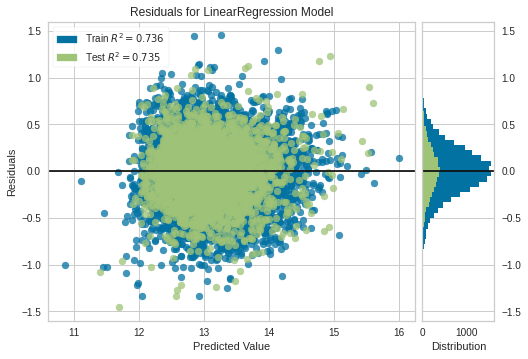

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train.values)  
visualizer.score(X_test, y_test.values)  
visualizer.show()   

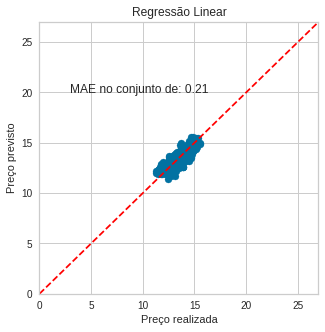

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
string_score = f"\nMAE no conjunto de: {mae:.2f}"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Regressão Linear")
plt.ylabel("Preço previsto")
plt.xlabel("Preço realizada")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo

Para precificar um novo a apartamento à medida que as variáveis: 'bedrooms', 'bathrooms','waterfront', 'view', 'condition', 'grade', 'yr_built','lat', 'long' são incluídas na base vamos seguir os passos abaixo:

1. Salvar o modelo em um arquivo binário (feito abaixo)

2. Criar um arquivo .py que faça o processo de limpeza e 
tratamento de variáveis. Vamos chamá-lo de model_handler.py. Esse arquivo será chamado antes do seu modelo rodar toda vez.

3. Criar uma aplicação utilizando flask ou serviços da AWS, como o sagemaker, em que leia um JSON com os inputs do modelo e retorne um json com o valor do preço. 

obs: lembrando que, como o modelo foi treinado com a target em log, vamos exponenciar o resultado do modelo (utilizar a função inversa) para obter o preço.

In [ ]:
### Exemplo do passo 1:
import pickle
# salvando o modelo em um arquivo binário
filename = './finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Lendo o modelo salvo posteriormente
modelo_salvo = pickle.load(open(filename, 'rb'))
result = modelo_salvo.predict(X_test[:1])
print(result)

[12.96318401]
